# Parameters and import data

In [1]:
# General import 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random 
from scipy.stats import uniform,loguniform, randint

# Stop warnings
import warnings
warnings.filterwarnings("ignore")

#sklearn import
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# tensorflow import
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D,Dense, Dropout, Activation, Flatten
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.regularizers import L1,L2,L1L2




# figure imports
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns

In [2]:
# parameters
n_eye_positions = 25
subject = 'sub-001'
roi = 'V1'

# uncomente for invibe 
# # defind data directory 
# # project_dir = '/home/ulascombes/disks/meso_shared/gaze_exp'
# project_dir = '~/disks/meso_shared/gaze_exp'
# pp_dir = '{}/derivatives/pp_data'.format(project_dir)
# df_fn = "{}/{}/desu".format(pp_dir,subject)

df_fn = '~/Desktop/projet/data'

# tsv names
df_name_GazeLines ='df_task_GazeLines_{roi}_runs.tsv'.format(roi=roi)
df_name_GazeColumns ='df_task_GazeColumns_{roi}_runs.tsv'.format(roi=roi)

# import datas 
df_gazelines =pd.read_table('{}/{}'.format(df_fn,df_name_GazeLines))
df_gazecolumns =pd.read_table('{}/{}'.format(df_fn,df_name_GazeColumns))

### drop 3 first TRs
df_gazelines = df_gazelines.drop(df_gazelines.index[:3]).reset_index(drop=True)
df_gazecolumns = df_gazecolumns.drop(df_gazecolumns.index[:3]).reset_index(drop=True)

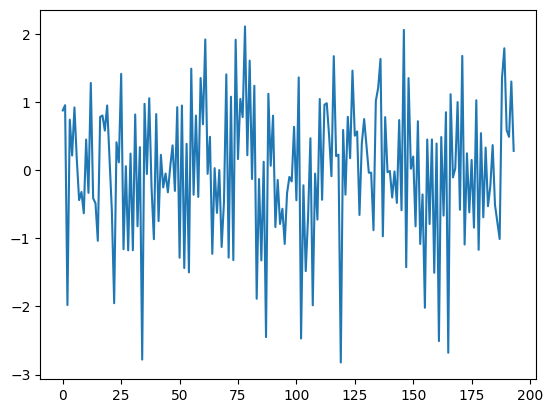

In [3]:
plt.plot(df_gazelines.index, df_gazelines['900'])

# Make an object with eye poisitions on gazelines runs

In [4]:
lines_positions = []
for i in range(n_eye_positions):
    a = i +1
    b = i +1
    lines_positions.append(a)
    lines_positions.append(b)
lines_positions_reverse = sorted(lines_positions, reverse=True)

lines_positions_0 = np.concatenate((lines_positions,lines_positions_reverse[2:]))
gazelines_position = np.concatenate((lines_positions_0,lines_positions_0[2:]))

In [5]:
gazelines_position

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17,
       18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 24,
       24, 23, 23, 22, 22, 21, 21, 20, 20, 19, 19, 18, 18, 17, 17, 16, 16,
       15, 15, 14, 14, 13, 13, 12, 12, 11, 11, 10, 10,  9,  9,  8,  8,  7,
        7,  6,  6,  5,  5,  4,  4,  3,  3,  2,  2,  1,  1,  2,  2,  3,  3,
        4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,  9, 10, 10, 11, 11, 12,
       12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20,
       21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 24, 24, 23, 23, 22, 22, 21,
       21, 20, 20, 19, 19, 18, 18, 17, 17, 16, 16, 15, 15, 14, 14, 13, 13,
       12, 12, 11, 11, 10, 10,  9,  9,  8,  8,  7,  7,  6,  6,  5,  5,  4,
        4,  3,  3,  2,  2,  1,  1])

# Make an object with eye positions on gazecolumns runs

In [6]:
columns_positions = [1,1,10,10,11,11,20,20,21,21,
                     22,22,19,19,12,12,9,9,2,2,
                     3,3,8,8,13,13,18,18,23,23,
                     24,24,17,17,14,14,7,7,4,4,
                     5,5,6,6,15,15,16,16,25,25]
                         
                        
                         
                         

columns_positions_reverse = sorted(columns_positions, reverse=True)

columns_positions_0 = np.concatenate((columns_positions,columns_positions_reverse[2:]))
gazecolumns_position = np.concatenate((columns_positions_0,columns_positions_0[2:]))

In [7]:
gazecolumns_position

array([ 1,  1, 10, 10, 11, 11, 20, 20, 21, 21, 22, 22, 19, 19, 12, 12,  9,
        9,  2,  2,  3,  3,  8,  8, 13, 13, 18, 18, 23, 23, 24, 24, 17, 17,
       14, 14,  7,  7,  4,  4,  5,  5,  6,  6, 15, 15, 16, 16, 25, 25, 24,
       24, 23, 23, 22, 22, 21, 21, 20, 20, 19, 19, 18, 18, 17, 17, 16, 16,
       15, 15, 14, 14, 13, 13, 12, 12, 11, 11, 10, 10,  9,  9,  8,  8,  7,
        7,  6,  6,  5,  5,  4,  4,  3,  3,  2,  2,  1,  1, 10, 10, 11, 11,
       20, 20, 21, 21, 22, 22, 19, 19, 12, 12,  9,  9,  2,  2,  3,  3,  8,
        8, 13, 13, 18, 18, 23, 23, 24, 24, 17, 17, 14, 14,  7,  7,  4,  4,
        5,  5,  6,  6, 15, 15, 16, 16, 25, 25, 24, 24, 23, 23, 22, 22, 21,
       21, 20, 20, 19, 19, 18, 18, 17, 17, 16, 16, 15, 15, 14, 14, 13, 13,
       12, 12, 11, 11, 10, 10,  9,  9,  8,  8,  7,  7,  6,  6,  5,  5,  4,
        4,  3,  3,  2,  2,  1,  1])

# Concate gazelines and gaze columns in axis =0

In [8]:
df_gaze_tot = pd.concat([df_gazelines,df_gazecolumns],axis=0).reset_index()

In [9]:
df_gaze_tot.shape

(388, 9461)

In [10]:
total_position = np.concatenate([gazelines_position,gazecolumns_position],axis=0)

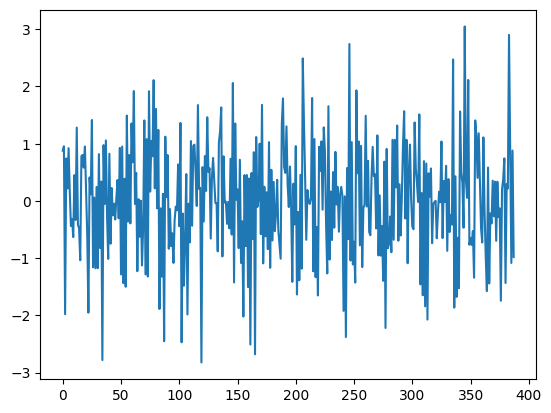

In [11]:
plt.plot(df_gaze_tot.index, df_gaze_tot['900'])

# Make a quarter visual field position object 

In [12]:
quarter_position_tot = np.zeros(len(total_position))

top_left = [1,2,10,9]
top_right = [4,5,7,6]
bottom_left = [20,19,21,21]
bottom_right = [17,16,24,25]
midl_left = [11,12]
midl_right = [14,15]
top_midl = [3,8]
bottom_midl = [18,23]

for t in range(len(total_position)): 
    if total_position[t] in top_left:
        quarter_position_tot[t] = 1
        
    elif total_position[t] in top_right:
        quarter_position_tot[t] = 2
        
    elif total_position[t] in bottom_left:
        quarter_position_tot[t] = 3
        
    elif total_position[t] in bottom_right:
        quarter_position_tot[t] = 4
        
    elif total_position[t] in midl_left:
        quarter_position_tot[t] = 5

    elif total_position[t] in midl_right:
        quarter_position_tot[t] = 6
        
    elif total_position[t] in top_midl:
        quarter_position_tot[t] = 7
        
    elif total_position[t] in bottom_midl:
        quarter_position_tot[t] = 8
    
    
    

In [13]:
quarter_position_tot.shape

(388,)

# Make a Half visual field position object 

In [14]:
midl_position_tot = np.zeros(len(total_position))

left =[1,2,10,9,11,12,20,19,21,22]
right = [4,5,7,6,14,15,17,16,24,25]
midl = [3,8,13,18,23]

for t in range(len(total_position)): 
    if total_position[t] in left:
        midl_position_tot[t] = 1
        
    elif total_position[t] in right:
        midl_position_tot[t] = 2
        
    elif total_position[t] in midl:
        midl_position_tot[t] = 3
        
    

In [15]:
midl_position_tot

array([1., 1., 1., 1., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 1.,
       1., 1., 1., 1., 1., 1., 1., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2.,
       3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 2., 2., 2., 2., 2.,
       2., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 3., 3., 1., 1., 1., 1., 1., 1., 3., 3.,
       2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 3., 2., 2., 2., 2., 2., 2., 3., 3., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 2., 2., 2., 2., 2., 2., 2.,
       2., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 2., 2.

# Decode position

### Split the data

In [16]:
# concatenated datas
# X_train, X_test, y_train, y_test = train_test_split(df_gaze_tot, total_position,stratify=total_position,random_state=42)

# concatenated datas non stratify
# X_train, X_test, y_train, y_test = train_test_split(df_gaze_tot, total_position,random_state=42)

# gazelines
# X_train, X_test, y_train, y_test = train_test_split(df_gazelines, gazelines_position,stratify=gazelines_position,random_state=42)

# gazecolumns
#X_train, X_test, y_train, y_test = train_test_split(df_gazecolumns, gazecolumns_position,stratify=gazecolumns_position,random_state=42)

# quarter position tot
# X_train, X_test, y_train, y_test = train_test_split(df_gaze_tot, quarter_position_tot,stratify=quarter_position_tot,random_state=42)

# quarter position tot non stratify
# X_train, X_test, y_train, y_test = train_test_split(df_gaze_tot, quarter_position_tot,random_state=42)


# midle position tot
X_train, X_test, y_train, y_test = train_test_split(df_gaze_tot, midl_position_tot,stratify=midl_position_tot,random_state=42)

# midle position tot non stratify
# X_train, X_test, y_train, y_test = train_test_split(df_gaze_tot, midl_position_tot,random_state=42)




# Machine learning

## SVM

In [24]:
model_1 = SVC(kernel='linear', random_state=42)
model_1.fit(X_train, y_train)

y_pred_train_1 = model_1.predict(X_train)
y_pred_test_1 = model_1.predict(X_test)

In [25]:
accuracy_score_train_1 = accuracy_score(y_pred_train_1, y_train)
accuracy_score_test_1 = accuracy_score(y_pred_test_1, y_test)

print('accuracy_score_train_1= ',accuracy_score_train_1 )
print('accuracy_score_test_1= ',accuracy_score_test_1 )

accuracy_score_train_1=  1.0
accuracy_score_test_1=  0.5360824742268041


In [123]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_1,normalize ='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

In [17]:
# plt.figure()
# plt.imshow(cm, interpolation='nearest', cmap='viridis')
# plt.title('Matrice de Confusion')
# plt.colorbar()


### optimisation 

In [27]:
param_dist = {
    'C': loguniform(1e-4, 1),
    'kernel' : ["linear", "poly", "rbf", "sigmoid"], 
    'gamma' : ['scale', 'auto']
}



In [28]:
svc = SVC(kernel='linear', random_state=42)

In [29]:
random_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=150, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)



RandomizedSearchCV(estimator=SVC(kernel='linear', random_state=42), n_iter=150,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x178431fd0>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, scoring='accuracy')

In [30]:
best_params = random_search.best_params_
best_score = random_search.best_score_
best_model_1 = random_search.best_estimator_

In [31]:
best_y_pred_train_1 = best_model_1.predict(X_train)
best_y_pred_test_1 = best_model_1.predict(X_test)

In [33]:
best_params

{'C': 0.00011529924570330215, 'gamma': 'auto', 'kernel': 'linear'}

In [32]:
best_accuracy_score_train_1 = accuracy_score(best_y_pred_train_1, y_train)
best_accuracy_score_test_1 = accuracy_score(best_y_pred_test_1, y_test)

print('accuracy_score_train_1= ',best_accuracy_score_train_1 )
print('accuracy_score_test_1= ',best_accuracy_score_test_1 )

accuracy_score_train_1=  0.7800687285223368
accuracy_score_test_1=  0.5876288659793815


# best model

In [17]:
best_model_1 = SVC(C = 0.0001152992457033021, gamma = 'auto',kernel='linear', random_state=42)
best_model_1.fit(X_train, y_train)

y_pred_train_1 = best_model_1.predict(X_train)
y_pred_test_1 = best_model_1.predict(X_test)

In [18]:
accuracy_score_train_1 = accuracy_score(y_pred_train_1, y_train)
accuracy_score_test_1 = accuracy_score(y_pred_test_1, y_test)

print('accuracy_score_train_1= ',accuracy_score_train_1 )
print('accuracy_score_test_1= ',accuracy_score_test_1 )

accuracy_score_train_1=  0.8213058419243986
accuracy_score_test_1=  0.6391752577319587
